In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
bd = pd.read_csv("bank-additional-full.csv", sep=';', quotechar='"')

In [11]:
# Encode categorical variables
label_encoder = LabelEncoder()
bd_categorical = bd.select_dtypes(include=['object'])
bd_categorical_encoded = bd_categorical.apply(label_encoder.fit_transform)

In [12]:
# Concatenate encoded categorical variables with numerical variables
bd_encoded = pd.concat([bd_categorical_encoded, bd.select_dtypes(exclude=['object'])], axis=1)

In [13]:
# Standardize numerical features
scaler = StandardScaler()
bd_scaled = scaler.fit_transform(bd_encoded)

In [14]:
# Calculate within-cluster sum of squares (WCSS) to find optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(bd_scaled)
    wcss.append(kmeans.inertia_)

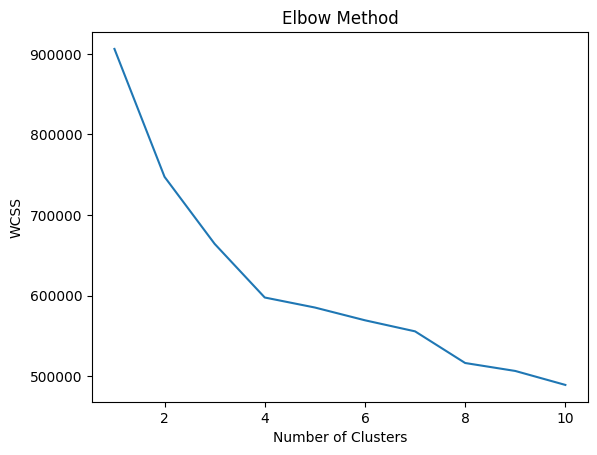

In [15]:
# Plot the elbow method to visualize optimal number of clusters
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [16]:
# Select the optimal number of clusters (where the decrease in WCSS slows down)
optimal_clusters = 4  # Change this value to 4 if you determine it's the optimal number of clusters


In [17]:
# Apply k-means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42)
kmeans.fit(bd_scaled)
bd['cluster'] = kmeans.labels_

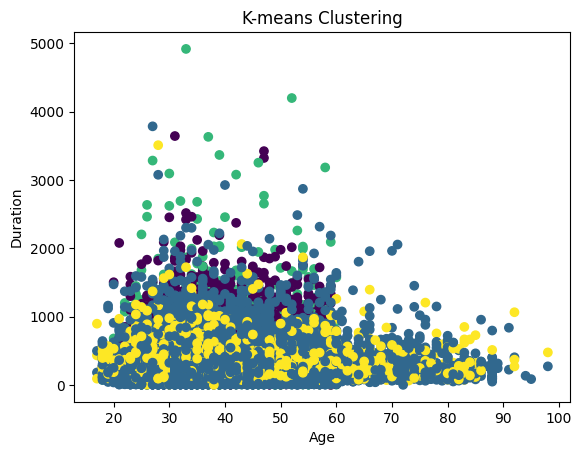

In [18]:
# Visualize the clusters (you can select any two features for visualization)
plt.scatter(bd['age'], bd['duration'], c=bd['cluster'], cmap='viridis')
plt.xlabel('Age')
plt.ylabel('Duration')
plt.title('K-means Clustering')
plt.show()

In [19]:
# Optionally, you can analyze the characteristics of each cluster by examining the cluster centroids
cluster_centroids = pd.DataFrame(kmeans.cluster_centers_, columns=bd_encoded.columns)
print(cluster_centroids)

        job   marital  education   default   housing      loan   contact  \
0  0.035694 -0.033264   0.128788  0.035757  0.049064  0.011617 -0.753278   
1 -0.008552  0.115941   0.015922 -0.237019  0.083376  0.001397 -0.557120   
2 -0.043072 -0.096429  -0.166977  0.230069 -0.131150 -0.012393  1.318270   
3  0.145622  0.194004   0.239056 -0.409793  0.054410 -0.002167 -0.603766   

      month  day_of_week  poutcome  ...  duration  campaign     pdays  \
0 -0.523796     0.071937  0.189111  ... -0.013606  0.070823  0.195414   
1  0.101127    -0.066263 -0.688512  ...  0.011451 -0.165243  0.195414   
2  0.390586    -0.014189  0.183752  ... -0.024319  0.113742  0.195414   
3  0.243951     0.048146  2.428464  ...  0.243404 -0.268967 -5.113760   

   previous  emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
0 -0.346920      0.653913        0.040229       0.095104   0.678095   
1  0.375283     -1.279733       -0.995838      -0.565277  -1.311062   
2 -0.342990      0.700707        0.92764

In [21]:
from sklearn.metrics import silhouette_score
silhouette = silhouette_score(bd_scaled, kmeans.labels_)
print("Silhouette Score:", silhouette)

Silhouette Score: 0.1833903802314521


In [22]:
from sklearn.metrics import davies_bouldin_score
davies_bouldin = davies_bouldin_score(bd_scaled, kmeans.labels_)
print("Davies-Bouldin Index:", davies_bouldin)


Davies-Bouldin Index: 1.742136895639884


In [23]:
from sklearn.metrics import calinski_harabasz_score
calinski_harabasz = calinski_harabasz_score(bd_scaled, kmeans.labels_)
print("Calinski-Harabasz Index:", calinski_harabasz)


Calinski-Harabasz Index: 7089.53890256349
